# Part 1: Define the Problem

Predict Product Pricing for products sold on Mercari Website.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from string import punctuation

## Setup

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
sns.set()
sns.set(palette="muted", color_codes=True)

# Import the data

In [3]:
# Create the training data
train = pd.read_csv('mercari/data/train.tsv', sep='\t')
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0000,0,Complete with certificate of authenticity


In [4]:
# Create test set
test = pd.read_csv('mercari/data/test.tsv', sep='\t', engine='python')

In [5]:
# Create log price variable (Transformation)
y = np.log1p(train['price'])

In [6]:
# Create combined data set
combined = pd.concat([train, test])
# Create the submission set 
submission = test[['test_id']]

# Create size of train
train_size = len(train)

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [7]:
combined.shape

(2175894, 9)

In [8]:
combined_ML = combined.sample(frac=0.1).reset_index(drop=True)

In [9]:
combined_ML.shape

(217589, 9)

# Part 2: Data Cleaning

In [10]:
# remove punctuation and digits
import string

train.item_description = train.item_description.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)
train.name = train.name.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)

test.item_description = test.item_description.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)
test.name = test.name.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)

combined_ML.item_description = combined_ML.item_description.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)
combined_ML.name = combined_ML.name.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)

combined.item_description = combined.item_description.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)
combined.name = combined.name.str.replace(r'[' +string.punctuation + ',0-9+]', '', regex=True)

In [11]:
# Lowercase the words

train.item_description = train.item_description.str.lower()
train.name = train.name.str.lower()
train.category_name = train.category_name.str.lower()
train.brand_name = train.brand_name.str.lower()

test.item_description = test.item_description.str.lower()
test.name = test.name.str.lower()
test.category_name = test.category_name.str.lower()
test.brand_name = test.brand_name.str.lower()

combined_ML.item_description = combined_ML.item_description.str.lower()
combined_ML.name = combined_ML.name.str.lower()
combined_ML.category_name = combined_ML.category_name.str.lower()
combined_ML.brand_name = combined_ML.brand_name.str.lower()

combined.item_description = combined.item_description.str.lower()
combined.name = combined.name.str.lower()
combined.category_name = combined.category_name.str.lower()
combined.brand_name = combined.brand_name.str.lower()


In [12]:
train_size

1482535

In [13]:
train.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

In [14]:
train.category_name.fillna(value='other/other/other', inplace=True)
train.item_description.fillna(value='no description yet', inplace=True)
train.brand_name.fillna(value='no brand', inplace=True)

test.category_name.fillna(value='other/other/other', inplace=True)
test.item_description.fillna(value='no description yet', inplace=True)
test.brand_name.fillna(value='no brand', inplace=True)

combined_ML.category_name.fillna(value='other/other/other', inplace=True)
combined_ML.item_description.fillna(value='no description yet', inplace=True)
combined_ML.brand_name.fillna(value='no brand', inplace=True)

combined.category_name.fillna(value='other/other/other', inplace=True)
combined.item_description.fillna(value='no description yet', inplace=True)
combined.brand_name.fillna(value='no brand', inplace=True)

In [15]:
train.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1482535
brand_name           1482535
price                1482535
shipping             1482535
item_description     1482535
dtype: int64

In [16]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [17]:
# remove stop words
from nltk.corpus import stopwords

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split() if i not in stop])
    return x


In [18]:
train.item_description = train.item_description.apply(remove_stop_words)
train.name = train.name.apply(remove_stop_words)

test.item_description = test.item_description.apply(remove_stop_words)
test.name = test.name.apply(remove_stop_words)

combined_ML.item_description = combined_ML.item_description.apply(remove_stop_words)
combined_ML.name = combined_ML.name.apply(remove_stop_words)

combined.item_description = combined.item_description.apply(remove_stop_words)
combined.name = combined.name.apply(remove_stop_words)

## Adding Features

In [19]:
train[['category_1', 'category_2', 'category_3']] = train.category_name.str.split("/", n=2, expand=True)
test[['category_1', 'category_2', 'category_3']] = test.category_name.str.split("/", n=2, expand=True)
combined_ML[['category_1', 'category_2', 'category_3']] = combined_ML.category_name.str.split("/", n=2, expand=True)
combined[['category_1', 'category_2', 'category_3']] = combined.category_name.str.split("/", n=2, expand=True)

In [ ]:
bins = [0, 64, 5000]
labels = ['less', 'more']

train['lt65'] = pd.cut(train['price'], bins=bins, labels=labels)
combined_ML['lt65'] = combined_ML.category_name.str.split("/", n=2, expand=True)
combined['lt65'] = combined.category_name.str.split("/", n=2, expand=True)

## Exploring the Data

### Price Distribution

In [20]:
train.price.describe()

count   1482535.0000
mean         26.7375
std          38.5861
min           0.0000
25%          10.0000
50%          17.0000
75%          29.0000
max        2009.0000
Name: price, dtype: float64

In [21]:
bins = [0, 10, 17, 29, 2010]
labels = ['q1', 'q2', 'q3', 'q4']
train['price_bin'] = pd.cut(train['price'], bins=bins, labels=labels)
train.groupby('price_bin')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_bin,,,,,,,,
q1,375615.0000,7.7152,2.0779,3.0000,6.0000,8.0000,10.0000,10.0000
q2,378177.0000,13.8429,1.7946,10.5000,12.0000,14.0000,15.0000,17.0000
q3,359743.0000,22.5557,3.3378,17.5000,20.0000,22.0000,25.0000,29.0000
q4,368126.0000,63.5435,63.7497,29.5000,35.0000,45.0000,66.0000,2009.0000


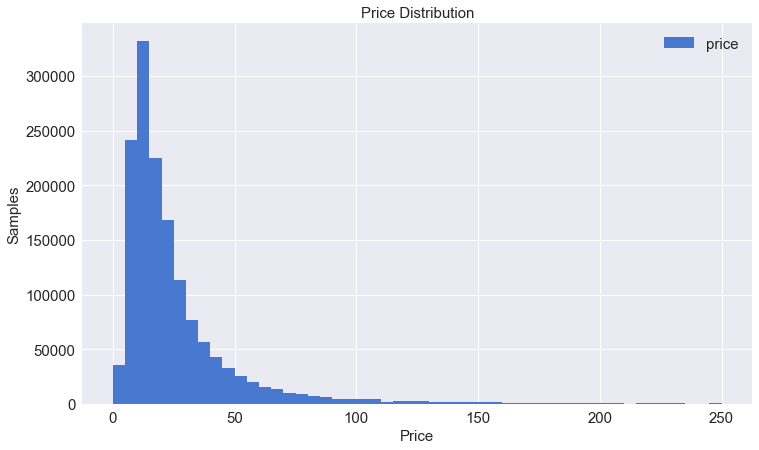

In [22]:
plt.figure(figsize=(12,7))
plt.hist(train['price'], bins=50, range=[0, 250], label='price')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


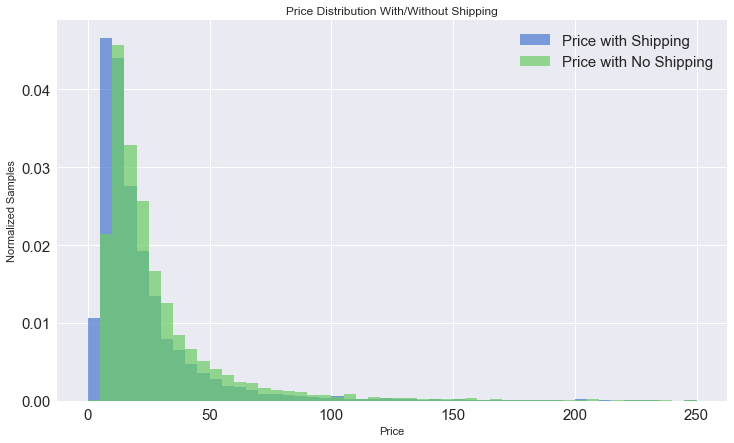

In [23]:
shipping=train[train['shipping'] == 1]['price']
no_shipping=train[train['shipping'] == 0]['price']

plt.figure(figsize=(12, 7))
plt.hist(shipping, bins=50, normed=True, range=[0, 250], alpha=0.7, label='Price with Shipping')
plt.hist(no_shipping, bins=50, normed=True, range=[0, 250], alpha=0.7, label='Price with No Shipping')
plt.title('Price Distribution With/Without Shipping')
plt.xlabel('Price')
plt.ylabel('Normalized Samples')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Brand Analysis

In [24]:
train['brand_name'].nunique()

4810

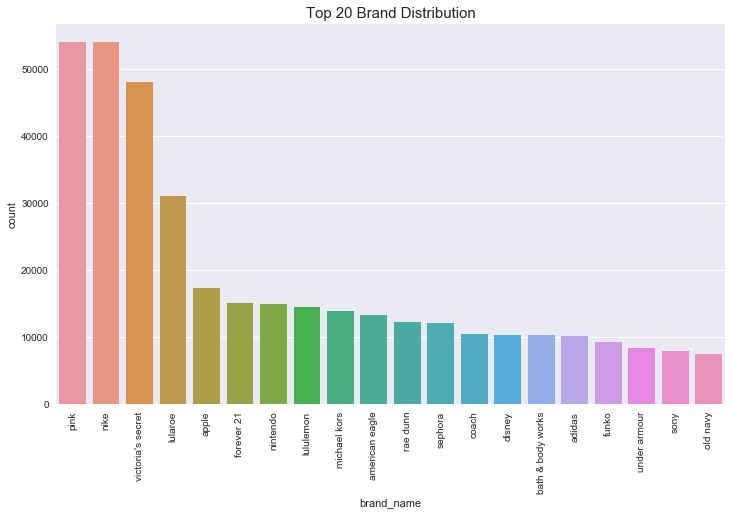

In [25]:
# Top 20 other than no brand
b20 = train['brand_name'].value_counts()[1:21].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='brand_name', y='count', data=b20)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

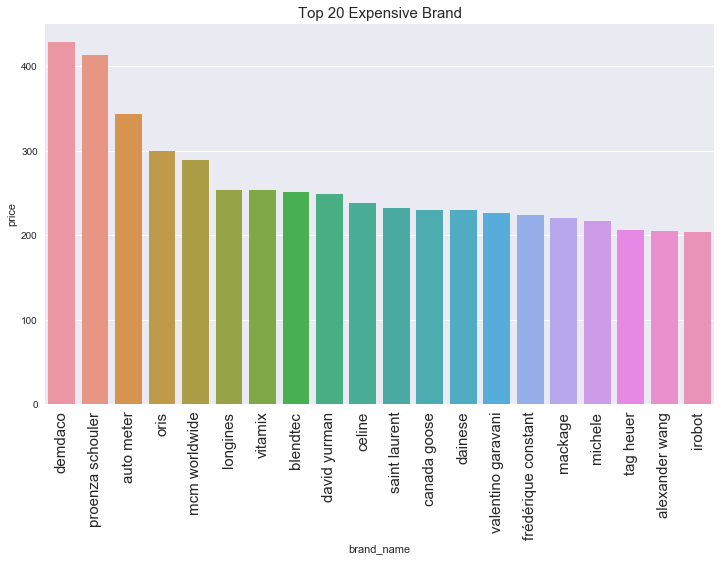

no brand                0.4268
pink                    0.0365
nike                    0.0365
victoria's secret       0.0324
lularoe                 0.0209
apple                   0.0117
forever 21              0.0102
nintendo                0.0101
lululemon               0.0098
michael kors            0.0094
american eagle          0.0089
rae dunn                0.0083
sephora                 0.0082
coach                   0.0071
disney                  0.0070
bath & body works       0.0070
adidas                  0.0069
funko                   0.0062
under armour            0.0057
sony                    0.0054
old navy                0.0051
hollister               0.0047
carter's                0.0043
urban decay             0.0042
the north face          0.0042
independent             0.0040
too faced               0.0039
xbox                    0.0039
brandy melville         0.0038
kate spade              0.0036
                         ...  
chronicle books         0.0000
kikit   

In [26]:
# top 20 expensive brands by mean price

top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending=False)['price'][0:20].reset_index())

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='brand_name', y='price', data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.show()
train['brand_name'].value_counts(1)

### Category Distribution

In [27]:
cat_train = train[['category_1', 'category_2', 'category_3', 'price']]
cat_train.head()

,category_1,category_2,category_3,price
0,men,tops,t-shirts,10.0000
1,electronics,computers & tablets,components & parts,52.0000
2,women,tops & blouses,blouse,10.0000
3,home,home décor,home décor accents,35.0000
4,women,jewelry,necklaces,44.0000


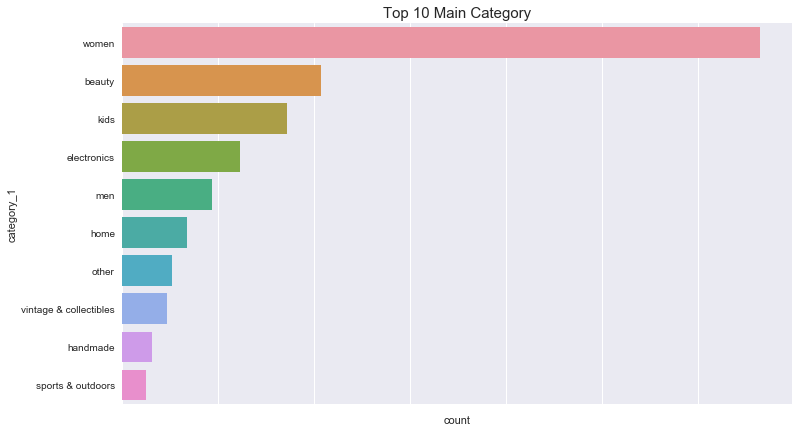

In [28]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(y=cat_train['category_1'], order=cat_train['category_1'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, fontsize=15)
ax.set_title('Top 10 Main Category', fontsize=15)
plt.show()


In [29]:
# Distribution
cat_train['category_1'].value_counts(1)

women                    0.4481
beauty                   0.1402
kids                     0.1158
electronics              0.0828
men                      0.0632
home                     0.0458
other                    0.0349
vintage & collectibles   0.0314
handmade                 0.0208
sports & outdoors        0.0171
Name: category_1, dtype: float64

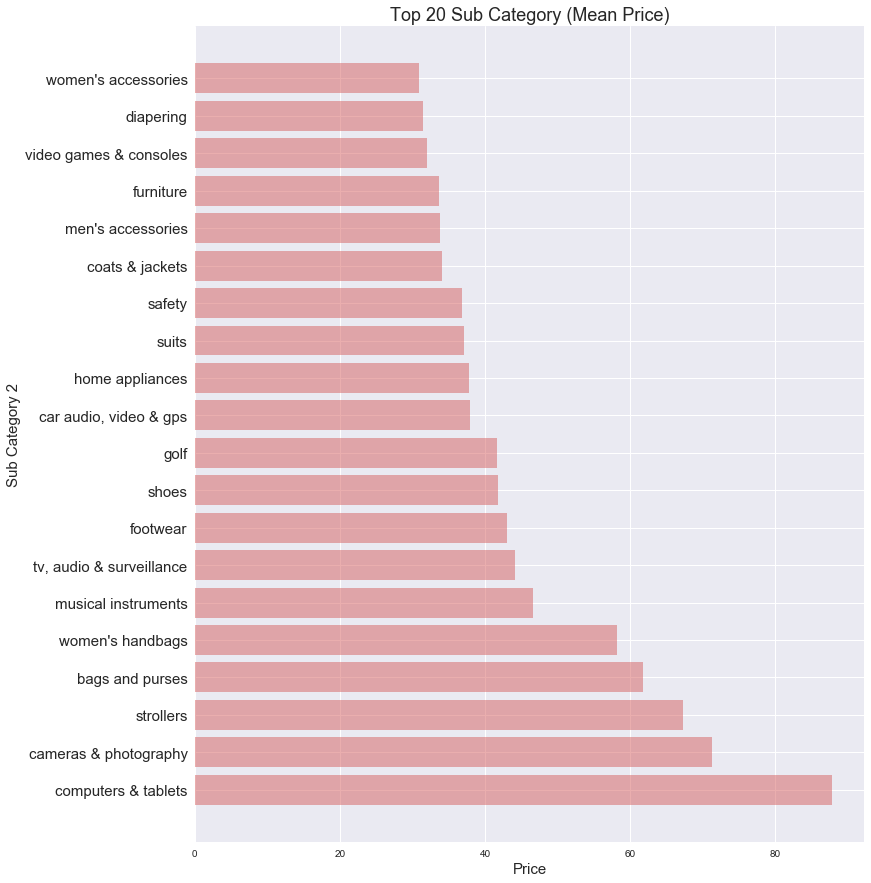

In [30]:
df = cat_train.groupby(['category_2'])['price'].agg(['mean']).reset_index().rename(columns={'index':'main', 'category_main':'count'})
df = df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(12, 15))
plt.barh(range(0, len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0, len(df)), df['category_2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 Sub Category (Mean Price)', fontsize=18)
plt.show()


### Item Description Analysis

In [31]:
descr = train[['item_description', 'price']]
descr['count'] = descr.item_description.str.len()
descr.head(3)

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,item_description,price,count
0,description yet,10.0000,15
1,keyboard great condition works like came box p...,52.0000,117
2,adorable top hint lace key hole back pale pink...,10.0000,71


In [32]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

descr['item_description'] = descr.item_description.apply(porter.stem)
descr.tail(10)

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,item_description,price,count
1482525,removable straps make strapless size b perfect...,7.0000,56
1482526,great harry potter shirt hogwarts school witch...,12.0000,123
1482527,brand new black white ribbed mock neck bodysuit,10.0000,47
1482528,purple paisley victorias secret tankini size l...,18.0000,103
1482529,rm set perfect condition holes stains like new...,34.0000,76
1482530,lace says size small fits medium perfectly nev...,20.0000,98
1482531,little mermaid handmade dress never worn s,14.0000,45
1482532,used twice still great shap,12.0000,28
1482533,one see red orange big red orange ones world m...,45.0000,51
1482534,new tag red sparkle firm price free ship,22.0000,44


/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


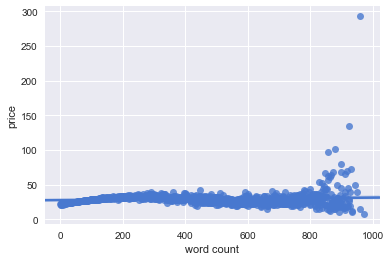

In [33]:
df = descr.groupby('count')['price'].mean().reset_index()
sns.regplot(x=df['count'], y=df['price'])
plt.xlabel('word count')
plt.show()

## Converting to Categorical

In [35]:
def to_categorical(df):
    df['brand_name'] = df['brand_name'].astype('category')
    df['category_name'] = df['category_name'].astype('category')
    df['item_condition_id'] = df['item_condition_id'].astype('category')
    
to_categorical(combined)


## Apply CountVectorizer / TfIdfVectorizer / LabelBinarizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import vstack, hstack, csr_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import Ridge


In [37]:
cv = CountVectorizer()
X_name = cv.fit_transform(combined['name'])
X_name

<2175894x148904 sparse matrix of type '<class 'numpy.int64'>'
	with 8377941 stored elements in Compressed Sparse Row format>

In [38]:
cv = CountVectorizer()
X_category = cv.fit_transform(combined['category_name'])
X_category

<2175894x1021 sparse matrix of type '<class 'numpy.int64'>'
	with 8711929 stored elements in Compressed Sparse Row format>

In [54]:
cv = CountVectorizer()
X_category_1 = cv.fit_transform(combined['category_1'])
cv = CountVectorizer()
X_category_2 = cv.fit_transform(combined['category_2'])
cv = CountVectorizer()
X_category_3 = cv.fit_transform(combined['category_3'])


In [39]:
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(combined['item_description'])

In [40]:
X_description

<2175894x55000 sparse matrix of type '<class 'numpy.float64'>'
	with 43367668 stored elements in Compressed Sparse Row format>

In [41]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(combined['brand_name'])

In [42]:
X_brand

<2175894x5290 sparse matrix of type '<class 'numpy.int64'>'
	with 2175894 stored elements in Compressed Sparse Row format>

## Create a CSR Matrix and merge the sparse matrices

In [43]:
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)
sparse_merge = hstack((X_dummies, X_description, X_category, X_name)).tocsr()

In [ ]:
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)
sparse_merge = hstack((X_dummies, X_description, X_category_1, X_category_2, X_category_3, X_name)).tocsr()

In [44]:
X_train_sparse = sparse_merge[:train_size]
X_test = sparse_merge[train_size:]

## Cross Validation

In [45]:
from sklearn.cross_validation import KFold

eval_size = .10
kf = KFold(len(y), round(1. / eval_size))
train_indices, valid_indices = next(iter(kf))
X_train, y_train = X_train_sparse[train_indices], y[train_indices]
X_valid, y_valid = X_train_sparse[valid_indices], y[valid_indices]

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y0), 2)))

In [47]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [48]:
params = {}
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

In [49]:
clf = lgb.train(params, d_train, 100)

In [50]:
lgbm_pred = clf.predict(X_valid)

In [51]:
np.expm1(lgbm_pred)

array([12.34728701, 28.94644712, 13.54537765, ..., 12.66567257,
       10.58751229, 12.27064031])

In [52]:
import time
start_time = time.time()

print('[{}] LGBM completed'.format(time.time() - start_time))
print("LGBM rmsle: "+ str(rmsle(np.expm1(y_valid), np.expm1(lgbm_pred))))

[2.7179718017578125e-05] LGBM completed
LGBM rmsle: 0.547887461934872


## Train with Ridge Regression

In [53]:
import time
start_time = time.time()

model = Ridge(solver="sag", fit_intercept=False)

print("Fitting Ridge Model")

model.fit(X_train, y_train)

preds_valid = model.predict(X_valid)


print('[{}] LGBM completed'.format(time.time() - start_time))
print("LGBM rmsle: "+ str(rmsle(np.expm1(y_valid), np.expm1(lgbm_pred))))

Fitting Ridge Model
[159.2265820503235] LGBM completed
LGBM rmsle: 0.547887461934872


## Predict on Test Set

In [55]:
preds = model.predict(X_test)

In [56]:
submission['price'] = np.expm1(preds)
submission.to_csv('mercari/submission_ridge.csv', index=False)
submission

/Users/sshivakumar2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,test_id,price
0,0,11.1292
1,1,10.4010
2,2,47.2022
3,3,14.3170
4,4,7.1783
5,5,9.6096
6,6,10.4254
7,7,34.5782
8,8,42.0681
9,9,8.2536
